# Random Forest Regressor

Let us use RandomForestRegressor to solve this problem. 

In [1]:
import pandas as pd
%pylab inline

import numpy as np
from sklearn.cross_validation import train_test_split
import math

Populating the interactive namespace from numpy and matplotlib


In [2]:
df=pd.read_csv("OnlineNewsPopularity.csv")

In [3]:
df = df.rename(columns = {
       'url': ' url'
        
    })

In [4]:
df.rename(columns=lambda x: x[1:], inplace=True)

In [5]:
df.data_channel_is_lifestyle.value_counts()

0.0    37545
1.0     2099
Name: data_channel_is_lifestyle, dtype: int64

In [6]:
y = df.pop('shares')

In [7]:
del df['url']
del df['timedelta']

In [8]:
df.columns

Index([u'n_tokens_title', u'n_tokens_content', u'n_unique_tokens',
       u'n_non_stop_words', u'n_non_stop_unique_tokens', u'num_hrefs',
       u'num_self_hrefs', u'num_imgs', u'num_videos', u'average_token_length',
       u'num_keywords', u'data_channel_is_lifestyle',
       u'data_channel_is_entertainment', u'data_channel_is_bus',
       u'data_channel_is_socmed', u'data_channel_is_tech',
       u'data_channel_is_world', u'kw_min_min', u'kw_max_min', u'kw_avg_min',
       u'kw_min_max', u'kw_max_max', u'kw_avg_max', u'kw_min_avg',
       u'kw_max_avg', u'kw_avg_avg', u'self_reference_min_shares',
       u'self_reference_max_shares', u'self_reference_avg_sharess',
       u'weekday_is_monday', u'weekday_is_tuesday', u'weekday_is_wednesday',
       u'weekday_is_thursday', u'weekday_is_friday', u'weekday_is_saturday',
       u'weekday_is_sunday', u'is_weekend', u'LDA_00', u'LDA_01', u'LDA_02',
       u'LDA_03', u'LDA_04', u'global_subjectivity',
       u'global_sentiment_polarity', u'gl

In [9]:
#df.timedelta.value_counts()

In [10]:
df.dtypes

n_tokens_title                   float64
n_tokens_content                 float64
n_unique_tokens                  float64
n_non_stop_words                 float64
n_non_stop_unique_tokens         float64
num_hrefs                        float64
num_self_hrefs                   float64
num_imgs                         float64
num_videos                       float64
average_token_length             float64
num_keywords                     float64
data_channel_is_lifestyle        float64
data_channel_is_entertainment    float64
data_channel_is_bus              float64
data_channel_is_socmed           float64
data_channel_is_tech             float64
data_channel_is_world            float64
kw_min_min                       float64
kw_max_min                       float64
kw_avg_min                       float64
kw_min_max                       float64
kw_max_max                       float64
kw_avg_max                       float64
kw_min_avg                       float64
kw_max_avg      

In [11]:
df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,...,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,...,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,0.306244,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,...,0.358755,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,0.411428,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000


In [12]:
y

0          593
1          711
2         1500
3         1200
4          505
5          855
6          556
7          891
8         3600
9          710
10        2200
11        1900
12         823
13       10000
14         761
15        1600
16       13600
17        3100
18        5700
19       17100
20        2800
21         598
22         445
23        1500
24         852
25         783
26        1500
27        1800
28         462
29         425
         ...  
39614     1400
39615     5700
39616     2100
39617      691
39618     1400
39619     1200
39620     2400
39621    24300
39622     2900
39623      947
39624     3200
39625     1400
39626     1100
39627     1200
39628     1000
39629     2400
39630     1500
39631      914
39632     1700
39633     1500
39634     1000
39635     1300
39636     1700
39637     1400
39638     1200
39639     1800
39640     1900
39641     1900
39642     1100
39643     1300
Name: shares, dtype: int64

In [13]:
y.value_counts()

1100      2308
1200      2018
1300      1740
1400      1592
1500      1323
1000      1177
1600      1137
1700      1013
1800       889
1900       810
2000       774
2100       661
2200       631
2300       511
2400       506
2600       442
2500       441
2700       435
2800       359
2900       356
3000       348
3100       306
3200       282
3400       271
3300       259
3500       252
3800       240
3600       233
3700       223
3900       200
          ... 
38400        1
139500       1
168          1
104          1
53           1
295          1
72100        1
92600        1
309          1
51500        1
277          1
43200        1
39700        1
149          1
67700        1
85           1
59400        1
8            1
80800        1
75600        1
34500        1
50700        1
42400        1
66900        1
72900        1
197600       1
310800       1
92           1
57800        1
82200        1
Name: shares, dtype: int64

In [14]:
y.dtype

dtype('int64')

In [15]:
df.dtypes

n_tokens_title                   float64
n_tokens_content                 float64
n_unique_tokens                  float64
n_non_stop_words                 float64
n_non_stop_unique_tokens         float64
num_hrefs                        float64
num_self_hrefs                   float64
num_imgs                         float64
num_videos                       float64
average_token_length             float64
num_keywords                     float64
data_channel_is_lifestyle        float64
data_channel_is_entertainment    float64
data_channel_is_bus              float64
data_channel_is_socmed           float64
data_channel_is_tech             float64
data_channel_is_world            float64
kw_min_min                       float64
kw_max_min                       float64
kw_avg_min                       float64
kw_min_max                       float64
kw_max_max                       float64
kw_avg_max                       float64
kw_min_avg                       float64
kw_max_avg      

In [16]:
df.global_subjectivity.dtype

dtype('float64')

In [17]:
df.data_channel_is_entertainment.value_counts()

0.0    32587
1.0     7057
Name: data_channel_is_entertainment, dtype: int64

In [18]:
df.data_channel_is_entertainment.dtype

dtype('float64')

In [19]:
df.isnull()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
from sklearn.cross_validation import train_test_split
import numpy as np
np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=.2)

In [21]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
print "R^2:", model.score(X_test, y_test).round(2)

R^2: -0.11


In [22]:
from sklearn.metrics import roc_auc_score
model = RandomForestRegressor(100, oob_score=True, n_jobs=-1, random_state=42)
model.fit(df,y)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [23]:
%pylab inline
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

#print "c-stat ", roc_auc_score(y,model.oob_prediction_) 
model.oob_score_

Populating the interactive namespace from numpy and matplotlib


-0.073806739120402254

C:\Users\Roopa\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


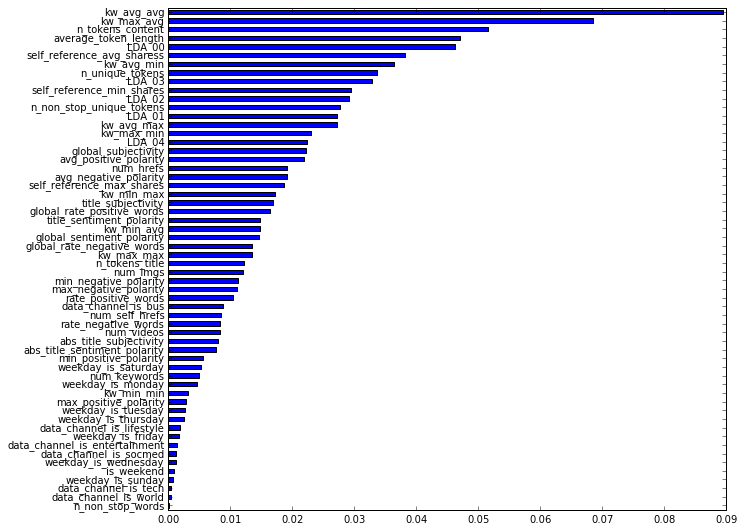

In [24]:
feature_importances = pd.Series(model.feature_importances_, index=df.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(10,9));